In [2]:
import sys
sys.path.append('/home/user1/OneDrive/Documents/Projects/Correlated QEC/corrqec/')

import stim

In [3]:
from src.noisemodel import LongTimePairPoly
from src.noisemodel import split_circuit

from stability_paper.circuits import surface_code_stability_experiment_circuit, surface_code_memory_experiment_circuit
from stability_paper.tools import NoiseModel
from stability_paper.tools._noise import NoiseRule

In [4]:
p = 0.01
model = LongTimePairPoly(A=1, p=p, n=2, noisy_qubits='data')

In [5]:
data_noise = p
measure_noise = p
noise = NoiseModel(
    idle_depolarization=data_noise,
    any_clifford_1q_rule=NoiseRule(after={'DEPOLARIZE1': data_noise}),
    measure_rules={
        'Z': NoiseRule(after={'DEPOLARIZE1': measure_noise}, flip_result=measure_noise),
    },
    gate_rules={
        'R': NoiseRule(after={'X_ERROR': measure_noise}),
        'CZ': NoiseRule(after={'DEPOLARIZE2': data_noise}),
    }
)

In [16]:
circuit = surface_code_stability_experiment_circuit(basis='Z', rounds=5, diam=2)
# circuit = surface_code_memory_experiment_circuit(basis='Z', rounds=5, diam=3)
noisy_circuit = noise.noisy_circuit(circuit)

In [17]:
circuit.diagram("timeline-3d")

{"accessors":[{"bufferView":0,"byteOffset":0,"componentType":5126,"count":12,"max":[0,0.5,0.5],"min":[0,-0.5,-0.5],"name":"cube","type":"VEC3"},{"bufferView":1,"byteOffset":0,"componentType":5126,"count":12,"max":[0.375,0.5625],"min":[0.3125,0.5],"name":"tex_coords_gate_R","type":"VEC2"},{"bufferView":2,"byteOffset":0,"componentType":5126,"count":12,"max":[0.125,0.5],"min":[0.0625,0.4375],"name":"tex_coords_gate_H","type":"VEC2"},{"bufferView":3,"byteOffset":0,"componentType":5126,"count":17,"max":[0,0.400000005960464,0.400000005960464],"min":[0,-0.400000005960464,-0.400000005960464],"name":"circle_loop","type":"VEC3"},{"bufferView":4,"byteOffset":0,"componentType":5126,"count":12,"max":[0.3125,0.5625],"min":[0.25,0.5],"name":"tex_coords_gate_M","type":"VEC2"},{"bufferView":5,"byteOffset":0,"componentType":5126,"count":90,"max":[1,-32,-32],"min":[-35,-37.6568565368652,-37.6568565368652],"name":"buf_scattered_lines","type":"VEC3"},{"bufferView":6,"byteOffset":0,"componentType":5126,"count":30,"max":[0,-29.5,-31],"min":[-23.25,-38.6568565368652,-38.6568565368652],"name":"buf_red_scattered_lines","type":"VEC3"}],"asset":{"version":"2.0"},"bufferViews":[{"buffer":0,"byteLength":144,"byteOffset":0,"name":"cube","target":34962},{"buffer":1,"byteLength":96,"byteOffset":0,"name":"tex_coords_gate_R","target":34962},{"buffer":2,"byteLength":96,"byteOffset":0,"name":"tex_coords_gate_H","target":34962},{"buffer":3,"byteLength":204,"byteOffset":0,"name":"circle_loop","target":34962},{"buffer":4,"byteLength":96,"byteOffset":0,"name":"tex_coords_gate_M","target":34962},{"buffer":5,"byteLength":1080,"byteOffset":0,"name":"buf_scattered_lines","target":34962},{"buffer":6,"byteLength":360,"byteOffset":0,"name":"buf_red_scattered_lines","target":34962}],"buffers":[{"byteLength":144,"name":"cube","uri":"data:application/octet-stream;base64,AAAAAAAAAD8AAAA/AAAAAAAAAD8AAAC/AAAAAAAAAL8AAAA/AAAAAAAAAD8AAAC/AAAAAAAAAL8AAAC/AAAAAAAAAL8AAAA/AAAAAAAAAL8AAAC/AAAAAAAAAD8AAAC/AAAAAAAAAL8AAAA/AAAAAAAAAL8AAAA/AAAAAAAAAD8AAAC/AAAAAAAAAD8AAAA/"},{"byteLength":96,"name":"tex_coords_gate_R","uri":"data:application/octet-stream;base64,AADAPgAAAD8AAKA+AAAAPwAAwD4AABA/AACgPgAAAD8AAKA+AAAQPwAAwD4AABA/AADAPgAAED8AAMA+AAAAPwAAoD4AABA/AACgPgAAED8AAMA+AAAAPwAAoD4AAAA/"},{"byteLength":96,"name":"tex_coords_gate_H","uri":"data:application/octet-stream;base64,AAAAPgAA4D4AAIA9AADgPgAAAD4AAAA/AACAPQAA4D4AAIA9AAAAPwAAAD4AAAA/AAAAPgAAAD8AAAA+AADgPgAAgD0AAAA/AACAPQAAAD8AAAA+AADgPgAAgD0AAOA+"},{"byteLength":204,"name":"circle_loop","uri":"data:application/octet-stream;base64,AAAAAM3MzD4AAAAAAAAAAOU1vT5Fvxw+AAAAAMPQkD7D0JA+AAAAAES/HD7lNb0+AAAAAPIwlrLNzMw+AAAAAEe/HL7lNb0+AAAAAMPQkL7D0JA+AAAAAOc1vb5Avxw+AAAAAM3MzL7yMBazAAAAAOU1vb5Evxy+AAAAAMHQkL7E0JC+AAAAADy/HL7nNb2+AAAAAPLkozHNzMy+AAAAAEm/HD7kNb2+AAAAAMbQkD6/0JC+AAAAAOY1vT5Evxy+AAAAAM3MzD4AAAAA"},{"byteLength":96,"name":"tex_coords_gate_M","uri":"data:application/octet-stream;base64,AACgPgAAAD8AAIA+AAAAPwAAoD4AABA/AACAPgAAAD8AAIA+AAAQPwAAoD4AABA/AACgPgAAED8AAKA+AAAAPwAAgD4AABA/AACAPgAAED8AAKA+AAAAPwAAgD4AAAA/"},{"byteLength":1080,"name":"buf_scattered_lines","uri":"data:application/octet-stream;base64,AAAAwCioBcIoqAXCAAAAwFBQC8JQUAvCAAAAwCioBcJ3+BDCAAAAwFBQC8KfoBbCAAAAwHf4EMIoqAXCAAAAwJ+gFsJQUAvCAACAwCioBcIoqAXCAACAwAAAAMJQUAvCAACAwCioBcJ3+BDCAACAwFBQC8JQUAvCAACAwHf4EMJ3+BDCAACAwFBQC8KfoBbCAADAwCioBcIoqAXCAADAwFBQC8IAAADCAADAwHf4EMIoqAXCAADAwFBQC8JQUAvCAADAwHf4EMJ3+BDCAADAwJ+gFsJQUAvCAAAAwSioBcJ3+BDCAAAAwQAAAMJQUAvCAAAAwXf4EMIoqAXCAAAAwVBQC8IAAADCAAAAwXf4EMJ3+BDCAAAAwVBQC8JQUAvCAABgwSioBcIoqAXCAABgwVBQC8JQUAvCAABgwSioBcJ3+BDCAABgwVBQC8KfoBbCAABgwXf4EMIoqAXCAABgwZ+gFsJQUAvCAACAwSioBcIoqAXCAACAwQAAAMJQUAvCAACAwSioBcJ3+BDCAACAwVBQC8JQUAvCAACAwXf4EMJ3+BDCAACAwVBQC8KfoBbCAACQwSioBcIoqAXCAACQwVBQC8IAAADCAACQwXf4EMIoqAXCAACQwVBQC8JQUAvCAACQwXf4EMJ3+BDCAACQwZ+gFsJQUAvCAACgwSioBcJ3+BDCAACgwQAAAMJQUAvCAACgwXf4EMIoqAXCAACgwVBQC8IAAADCAACgwXf4EMJ3+BDCAACgwVBQC8JQUAvCAADQwSioBcIoqAXCAADQwVBQC8JQUAvCAADQwSioBcJ3+BDCAADQwVBQC8KfoBbCAADQwXf4EMIoqA

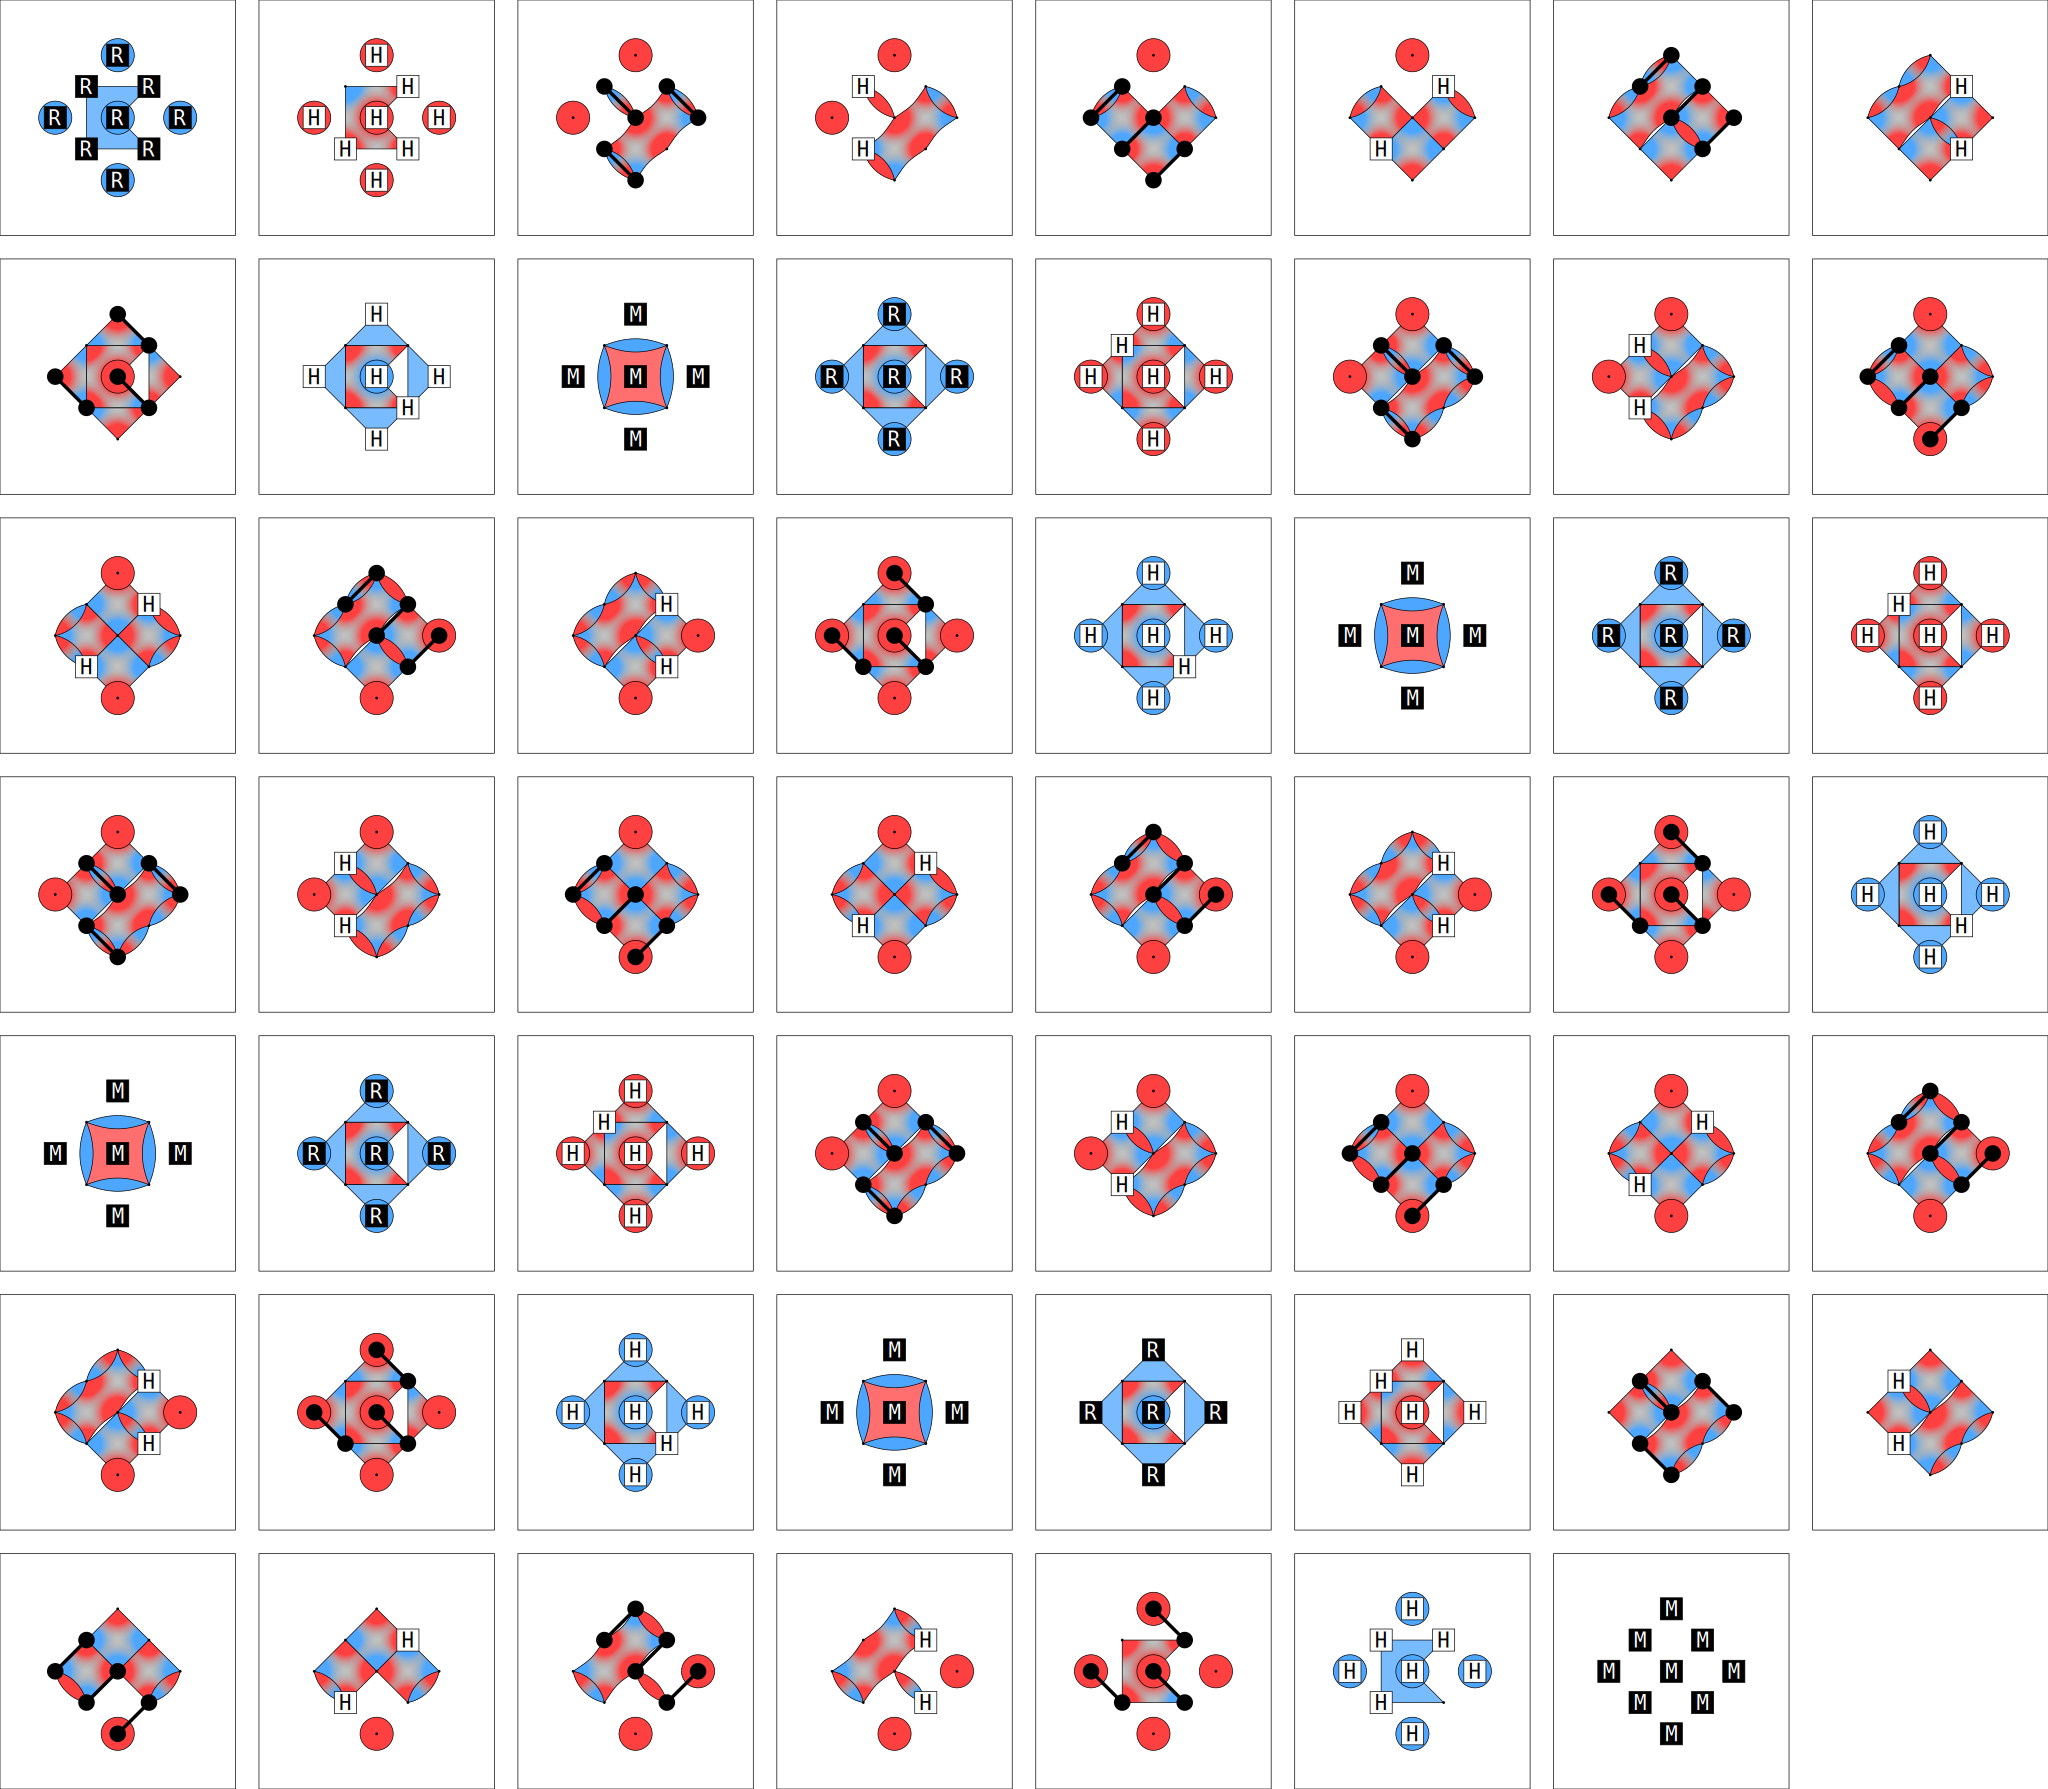

In [101]:
circuit.diagram("detslice-with-ops-svg")

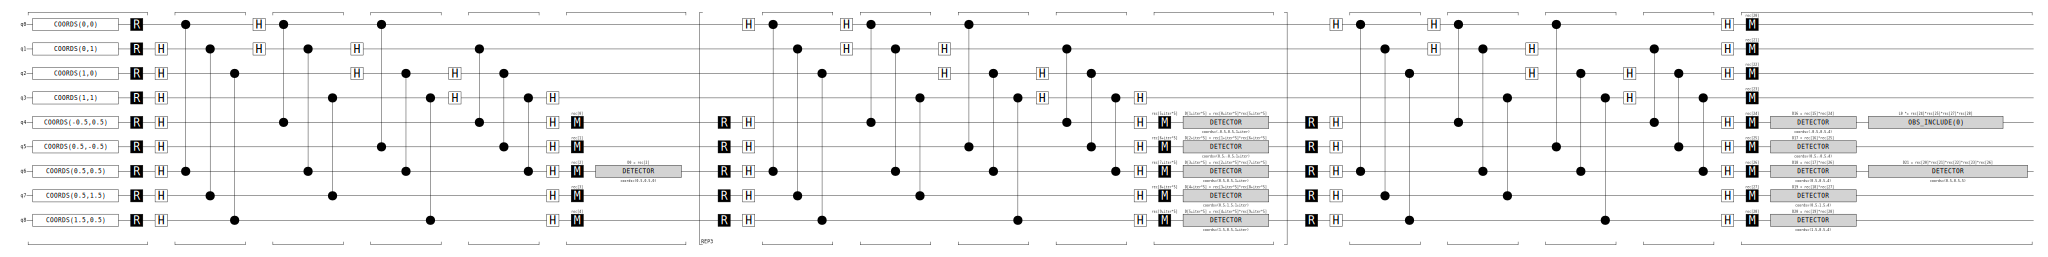

In [19]:
circuit.diagram("timeline-svg")

In [57]:
circuits, repeat_count = split_circuit(circuit)

In [65]:
circuits[0]

stim.Circuit('''
    QUBIT_COORDS(0, 0) 0
    QUBIT_COORDS(0, 1) 1
    QUBIT_COORDS(1, 0) 2
    QUBIT_COORDS(1, 1) 3
    QUBIT_COORDS(-0.5, 0.5) 4
    QUBIT_COORDS(0.5, -0.5) 5
    QUBIT_COORDS(0.5, 0.5) 6
    QUBIT_COORDS(0.5, 1.5) 7
    QUBIT_COORDS(1.5, 0.5) 8
    R 0 1 2 3 4 5 6 7 8
    TICK
''')

In [64]:
model.get_noisy_qubit_coords(circuit)

UnboundLocalError: cannot access local variable 'syndrome_qubits' where it is not associated with a value

In [63]:
circuits[3]

stim.Circuit('''
    R 4 5 6 7 8
    TICK
    H 0 4 5 6 7 8
    TICK
    CZ 0 6 1 7 2 8
    TICK
    H 0 1
    TICK
    CZ 0 4 1 6 3 7
    TICK
    H 1 2
    TICK
    CZ 0 5 2 6 3 8
    TICK
    H 2 3
    TICK
    CZ 1 4 2 5 3 6
    TICK
    H 0 1 2 4 5 6 7 8
    TICK
    M 0 1 2 3 4 5 6 7 8
    DETECTOR(-0.5, 0.5, 0) rec[-14] rec[-5]
    DETECTOR(0.5, -0.5, 0) rec[-13] rec[-4]
    DETECTOR(0.5, 0.5, 0) rec[-12] rec[-3]
    DETECTOR(0.5, 1.5, 0) rec[-11] rec[-2]
    DETECTOR(1.5, 0.5, 0) rec[-10] rec[-1]
    SHIFT_COORDS(0, 0, 1)
    DETECTOR(0.5, 0.5, 0) rec[-9] rec[-8] rec[-7] rec[-6] rec[-3]
    OBSERVABLE_INCLUDE(0) rec[-5] rec[-4] rec[-2] rec[-1]
''')

In [32]:
stim_circuit = stim.Circuit.generated('surface_code:rotated_memory_z', distance=3, rounds=3)

In [34]:
stim_circuits, repeat_count = split_circuit(stim_circuit)

In [52]:
stim_circuits[3]

stim.Circuit('''
    M 1 3 5 8 10 12 15 17 19
    DETECTOR(0, 4, 1) rec[-3] rec[-6] rec[-13]
    DETECTOR(2, 2, 1) rec[-5] rec[-6] rec[-8] rec[-9] rec[-16]
    DETECTOR(4, 4, 1) rec[-1] rec[-2] rec[-4] rec[-5] rec[-11]
    DETECTOR(6, 2, 1) rec[-4] rec[-7] rec[-14]
    OBSERVABLE_INCLUDE(0) rec[-7] rec[-8] rec[-9]
''')